In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [73]:
img = cv2.imread("practice/1.jpg")

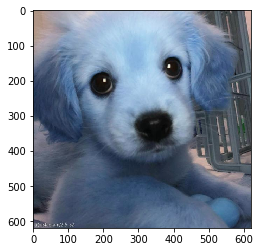

In [3]:
plt.imshow(img)

In [7]:
img.item(1)

151

In [8]:
img[10,10,2]

130

In [9]:
img.item((10,10,2))

130

> - `item`은 인덱싱과 같다.

In [11]:
img.itemset((10,10,2),100)

In [12]:
img.item(10,10,2)

100

> - `itemset`은 인덱싱해서 재할당 하는 것과 같음.

In [14]:
# Error
Image.open("practic/NONE.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'practic/NONE.jpg'

In [17]:
im = cv2.imread("practice/NONE.jpg")

In [20]:
print(im)

None


> - cv2는 IOError가 일어나지 않는다. 파일이 없으면 None으로 읽어온다.
- PIL은 IOError를 일으킨다.

In [22]:
# Error

if not cv2.imread("practice/NONE.jpg"):
    raise IOError("No such file or directory")

OSError: No such file or directory

> - 이렇게 if 문으로 파일 체크한 후에 에러를 내는 방법으로 사용한다.

Modulo  VS  Saturation
이미지는 0~255 사이의 값을 가진다. (8bit)

- modulo: 값의 범위를 넘어가면 max 값으로 나눈 나머지를 반환한다.
    - 만약 300 이면 -> 45
- saturation: 값의 범위를 제한 시켜서 넘어가지 않도록 한다.
    - 만약 300 이면 -> 255

In [75]:
x = img+img
x

array([[[ 86,  46,  12],
        [ 86,  46,  12],
        [ 86,  46,  12],
        ...,
        [174, 110,  88],
        [176, 112,  90],
        [178, 114,  92]],

       [[ 84,  44,  10],
        [ 84,  44,  10],
        [ 84,  44,  10],
        ...,
        [170, 106,  84],
        [172, 108,  86],
        [174, 110,  88]],

       [[ 80,  40,   6],
        [ 80,  40,   6],
        [ 82,  42,   8],
        ...,
        [166, 102,  80],
        [168, 104,  82],
        [170, 106,  84]],

       ...,

       [[190, 186, 224],
        [200, 196, 234],
        [210, 208, 240],
        ...,
        [118, 146, 190],
        [126, 154, 192],
        [132, 160, 198]],

       [[202, 198, 236],
        [206, 202, 240],
        [212, 208, 246],
        ...,
        [124, 152, 196],
        [132, 160, 198],
        [136, 164, 202]],

       [[200, 196, 234],
        [202, 198, 236],
        [204, 200, 238],
        ...,
        [124, 152, 196],
        [130, 158, 196],
        [132, 160, 198]]

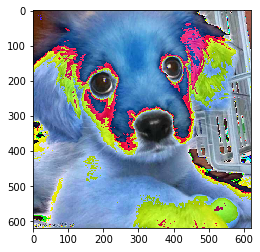

In [76]:
plt.imshow(x)

> - numpy는 기본적으로 modulo 연산한다.
- modulo 방식은 이미지 색이 이상해질 수 있다.

In [30]:
img2 = np.ones_like(img, dtype=np.uint8)*200 + np.array(60, dtype=np.uint8)

In [48]:
np.where(img2>255, img2, 255)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

> - numpy에서 saturation 연산 하려면 where를 쓸 수있다.

In [35]:
x = cv2.add(img,img)

In [36]:
x

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[190, 186, 224],
        [200, 196, 234],
        [210, 208, 240],
        ...,
        [118, 146, 190],
        [126, 154, 192],
        [132, 160, 198]],

       [[202, 198, 236],
        [206, 202, 240],
        [212, 208, 246],
        ...,
        [124, 152, 196],
        [132, 160, 198],
        [136, 164, 202]],

       [[200, 196, 234],
        [202, 198, 236],
        [204, 200, 238],
        ...,
        [124, 152, 196],
        [130, 158, 196],
        [132, 160, 198]]

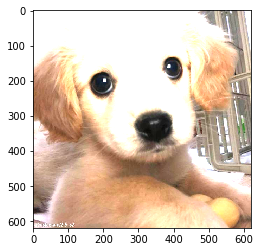

In [72]:
plt.imshow(x[:,:,::-1])

> - `cv2.add`는 포토샵에서 레이어간 연산하는 것과 같음. (highlight, overlay 등)
- `cv2.add`는 saturation로 연산한다. (numpy 기본은 modulo인것과 다름)

In [40]:
np.max(img)

254

In [45]:
np.maximum(5,[2,3])

array([5, 5])

> - numpy에서는 `max`와 `maximum`은 다르다.
- `max`는 가장 큰 element를 찾아준다.
- `maximum`은 두개를 인자로 받아서 큰거를 반환해준다.
    - ufunc, broadcasting 적용

In [92]:
img = cv2.imread("practice/1.jpg")

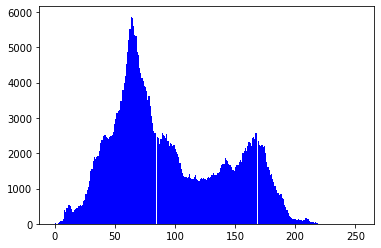

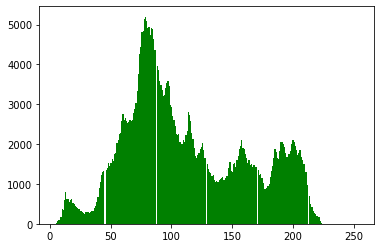

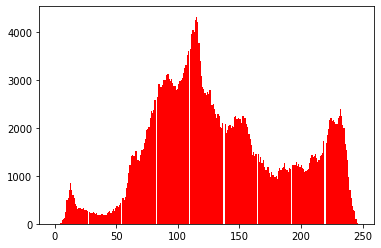

In [85]:
plt.hist(img[:,:,0].ravel(), 256, color="b")
plt.show()

plt.hist(img[:,:,1].ravel(), 256, color="g")
plt.show()

plt.hist(img[:,:,2].ravel(), 256, color="r")
plt.show()

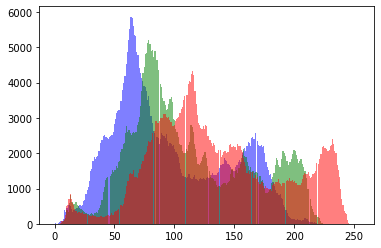

In [93]:
plt.hist(img[:,:,0].ravel(), 256, color="b", alpha=.5)
plt.hist(img[:,:,1].ravel(), 256, color="g", alpha=.5)
plt.hist(img[:,:,2].ravel(), 256, color="r", alpha=.5)
plt.show()

> - histogram은 분포를 알 수 있다.
- 255쪽이 많을 수록 색이 진하고, 0쪽으로 갈수록 어둡다.
- `flatten`과 `Counter`로 만들 수 있고, `plt.hist`는 자동으로 해준다.

In [51]:
[_ for _ in dir(cv2) if _.startswith("THRESH_")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [87]:
img = cv2.imread("practice/1.jpg", 0)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [88]:
thresh1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

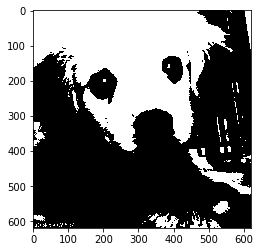

In [89]:
plt.imshow(thresh1, "gray")

> - threshold는 임계치이다.
- 임계치를 넘으면 특정값, 안 넘으면 0으로 바꿔준다.
- Option에 따라서 조금씩 다르다.

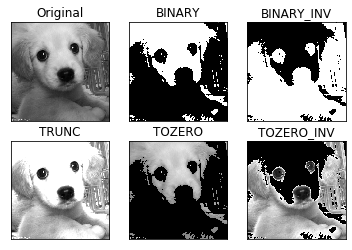

In [90]:
ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

> - threshold 옵션 예제들

In [ ]:
cv2.adaptiveThreshold

> - `cv2.adaptiveThreshold`는 특정 위치에만 다른 threshold 값을 거는 방법.
- 우리 수업에서는 안할건데 있다는 것만 알아두기

In [ ]:
cv2.THRESH_OTSU

> - `cv2.THRESH_OTSU`는 histogram을 보고 적절하게 디테일을 살릴 수 있는 threshold값을 구해준다.
- 내부 알고리즘까지 이해하려면 하루 나절이 걸리니 뭔지만 알아두자

In [95]:
[(_, getattr(cv2, _)) for _ in dir(cv2) if _.startswith("THRESH_")]

[('THRESH_BINARY', 0),
 ('THRESH_BINARY_INV', 1),
 ('THRESH_MASK', 7),
 ('THRESH_OTSU', 8),
 ('THRESH_TOZERO', 3),
 ('THRESH_TOZERO_INV', 4),
 ('THRESH_TRIANGLE', 16),
 ('THRESH_TRUNC', 2)]

In [ ]:
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

> - threshold 옵션들은 2의 배수로 되어있다. (inv 같은 특수 예제 빼고)
- 그래서 서로 더해도 겹치는 경우가 없다. (orthogonal)
- 그래서 `cv2.THRESH_BINARY+cv2.THRESH_OTSU`같은 방법으로 결합해서 쓸 수 있다.

데이터는 많으면 많을수록 좋다.  
데이터가 적으면? 오버피팅이 발생한다.  
해결책?
    1. 데이터를 더 모아온다. 
    2. feature를 줄인다. (feature selection, feature extraction) <- 차원의 저주 줄이기
    
이미지에서 feature selection하는 방법
    1. gray scale
    2. gray scale + threshold

In [100]:
cv2.resize

<function resize>

> - resize는 크게, 작게 이미지 크기를 바꾸는 역할을 한다.
- 작은걸 크게 만들때는 비어있는 곳을 채우기 위해서 보간(interpolation)이 필요하다.

In [104]:
[_ for _ in dir(cv2) if _.startswith("INTER_")]

['INTER_AREA',
 'INTER_BITS',
 'INTER_BITS2',
 'INTER_CUBIC',
 'INTER_LANCZOS4',
 'INTER_LINEAR',
 'INTER_LINEAR_EXACT',
 'INTER_MAX',
 'INTER_NEAREST',
 'INTER_TAB_SIZE',
 'INTER_TAB_SIZE2']

In [ ]:
plt.imshow(interpolation=)
# Supported values are 'none', 'nearest', 'bilinear', 'bicubic',
#     'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
#     'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc',
#     'lanczos'.


In [105]:
im = Image.open("practice/1.jpg")

In [ ]:
im.resize
# :param resample: An optional resampling filter.  This can be
#    one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
#    :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
#    :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
#    If omitted, or if the image has mode "1" or "P", it is
#    set :py:attr:`PIL.Image.NEAREST`.

> - 라이브러리마다 resize의 interpolation 옵션이 조금씩 다르다.
- PIL, CV, matplotlib 모두 resize를 지원한다.


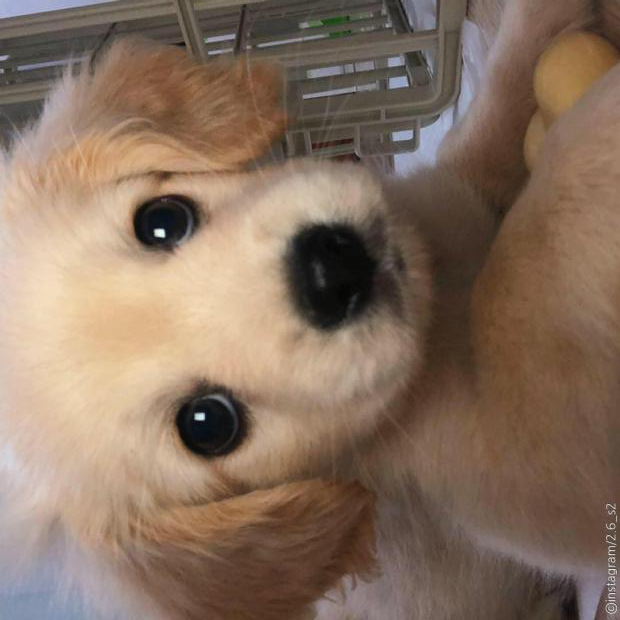

In [110]:
im.rotate(90)

In [111]:
img = cv2.imread("practice/1.jpg")

In [106]:
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)

In [107]:
M

array([[ 3.061617e-17,  5.000000e-01,  1.550000e+02],
       [-5.000000e-01,  3.061617e-17,  4.650000e+02]])

In [115]:
dst = cv2.warpAffine(img, M, (cols,rows))

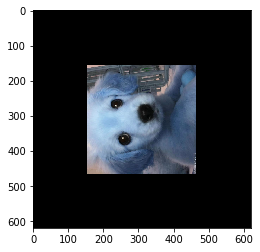

In [117]:
plt.imshow(dst)

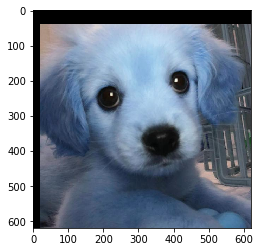

In [154]:
img = cv2.imread("practice/1.jpg")
rows, cols = img.shape[:2]
M = np.float32([[1,0,20],
       [0,1,40]])
dst = cv2.warpAffine(img, M, (cols,rows))
plt.imshow(dst)

> - affine으로 이미지 변환 별거 다해볼수있다.
- Computer Vision 제대로 하면 affine만 한달 배운다.

bitwise 비트연산자
- numpy, pandas 내부에서도 사용할 수 있다. (True False 연산)

In [166]:
a = 0b111
b = 0b101

In [157]:
a & b

5

> - 같은 자릿수에 둘다 1이 있으면 1, 하나라도 없으면 0
- or 개념

In [158]:
a | b

7

> - 같은 자릿수에 하나라도 1 있으면 1
- and 개념

In [161]:
~a

-8

> - 0이면 1, 1이면 0으로 바꿔준다.
- 바꿨을때 다 0이면 맨 앞자리에 1을 붙여준다.
- a는 000 -> 1000 으로 바뀌어서 -8이 나옴

In [163]:
c = np.arange(10)
c[(c>3)&(c>5)]

array([6, 7, 8, 9])

> bitwise 연산으로 이런거 할 수 있다.

In [167]:
a ^ b

2

> - 대칭 차집합
- XOR gate